# 第１章　基本的なクラスタリングを行う10本ノック

## ノック1:k-meansで非階層型クラスタリングを実施してみよう




In [32]:
import pandas as pd 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt 
import japanize_matplotlib
%matplotlib inline

iris = load_iris()

In [2]:
iris.data.shape

(150, 4)

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#データフレームにする
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


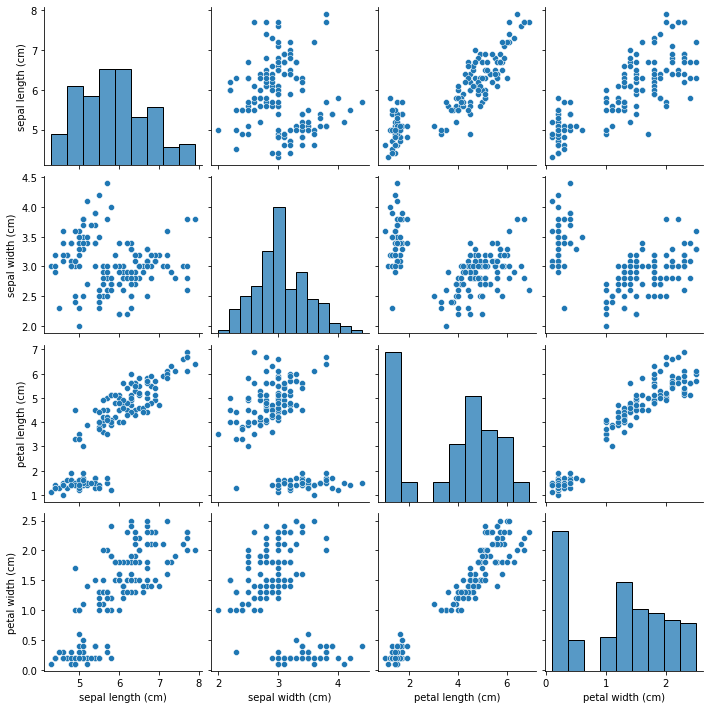

In [7]:
import seaborn as sns
df_temp = df_iris.copy()
sns.pairplot(df_temp)

In [8]:
#n_clusters:クラスタ数 random_state:乱数シード、固定しないと毎回結果が変わる
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init="random")
cls_data = df_iris.copy()
model.fit(cls_data)

KMeans(init='random', n_clusters=3, random_state=0)

In [9]:
cluster = model.predict(cls_data)
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

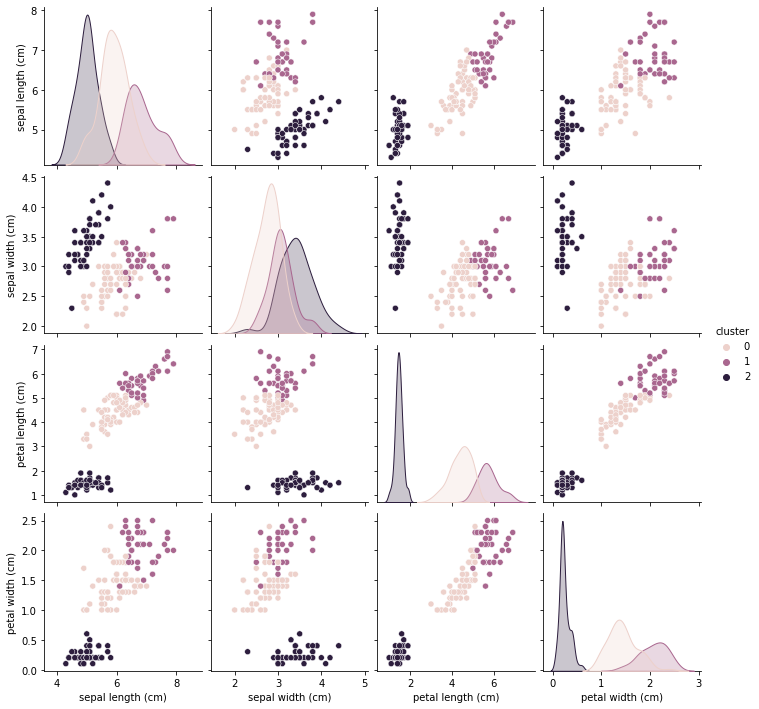

In [10]:
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue='cluster')

In [11]:
cls_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [12]:
#クラスターの中心を求める
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,6.850000,3.073684,5.742105,2.071053
2,5.006000,3.428000,1.462000,0.246000


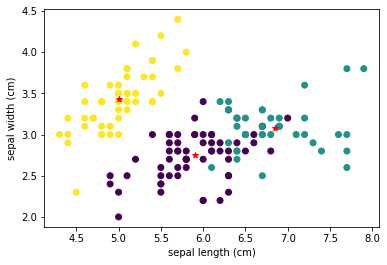

In [13]:
#クラスターのセンターを可視化する
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'], c=cls_data['cluster'])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(cluster_center["sepal length (cm)"],
            cluster_center["sepal width (cm)"], marker="*", color="red")


In [14]:
display(cls_data.groupby('cluster').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.90,2.75,4.39,1.43
1,6.85,3.07,5.74,2.07
2,5.01,3.43,1.46,0.25


In [15]:
cls_data["target"] = iris.target
cls_data.loc[cls_data["target"] == 0, "target"] = "setosa"
cls_data.loc[cls_data["target"] == 1, "target"] = "versicolor"
cls_data.loc[cls_data["target"] == 2, "target"] = "virginica"
display(cls_data.groupby("target").mean().round(2))


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,2.00
versicolor,5.94,2.77,4.26,1.33,0.04
virginica,6.59,2.97,5.55,2.03,0.72


## ノック2:クラスタリングの結果を評価してみよう

In [16]:
#調整ランド指数：ARI ちゃんとクラス分けできているか
#正解率：Accuracy クラスタラベルとクラスタリング結果の一致
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
ari = 'ARI:{:.2f}'.format(adjusted_rand_score(iris.target, cls_data['cluster']))
accuracy = 'Accuracy:{:.2f}'.format(accuracy_score(iris.target, cls_data['cluster']))
print(ari)
print(accuracy)

ARI:0.73
Accuracy:0.01


## ノック3:k-means++で非階層型クラスタリングを実施してみよう




複数のクラスタセンターが近い位置からスタートすると効率的にクラスタリングできない<br>
k-means++では初期のクラスタセンターを離れた位置に設定してくれる

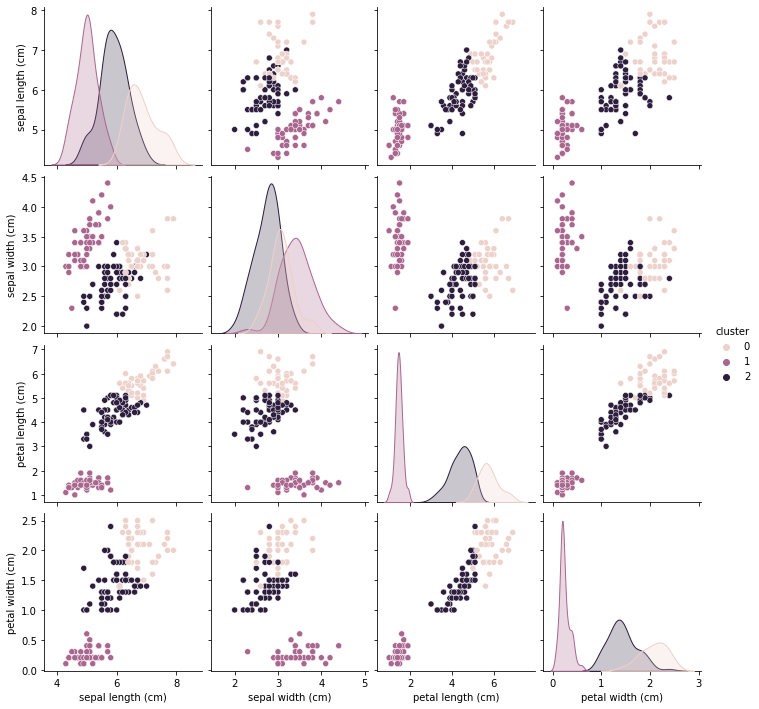

In [17]:
model = KMeans(n_clusters=3, random_state=0, init='k-means++')
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [18]:
ari = 'ARI:{:.2f}'.format(adjusted_rand_score(
    iris.target, cls_data['cluster']))
print(ari)


ARI:0.73


ARI:0.54


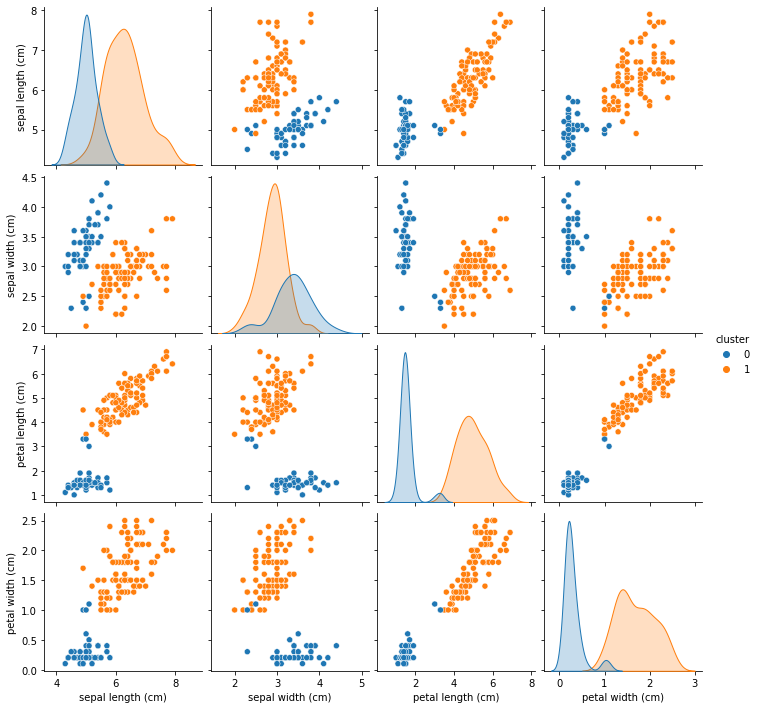

In [19]:
model = KMeans(n_clusters=2, random_state=0, init='k-means++')
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')
ari = 'ARI:{:.2f}'.format(adjusted_rand_score(
    iris.target, cls_data['cluster']))
print(ari)


## ノック4:エルボー法で最適なクラスター数を探索してみよう  




<function matplotlib.pyplot.show(close=None, block=None)>

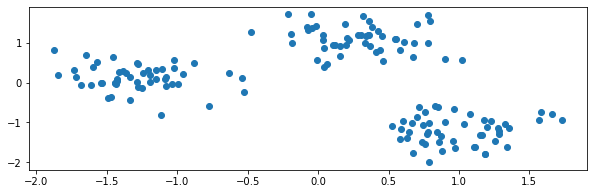

In [20]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing
X,y=make_blobs(n_samples=150, #サンプル店の総数
               n_features=2,  #説明変数（次元数）の指定　defaultは２
               centers=3,     #クラスタの個数
               cluster_std=0.5,#クラスタ内の標準偏差
               shuffle=True,  #サンプルをシャッフル
               random_state=0 #乱数生成器の状態を指定　数値を指定することで固定
               )
sc = preprocessing.StandardScaler()
X_norm=sc.fit_transform(X)#標準化
x=X_norm[:,0]
y=X_norm[:,1]
plt.figure(figsize=(10,3))
plt.scatter(x,y)
plt.show

![](2022-08-28-06-32-41.png)

In [26]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_norm)
    distortions.append(km.inertia_)

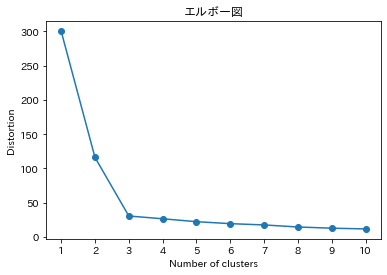

In [33]:
plt.plot(range(1,11),distortions,marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('エルボー図')
plt.show()
#急激に数値が変化しているクラスタ数３を選ぶ

<function matplotlib.pyplot.show(close=None, block=None)>

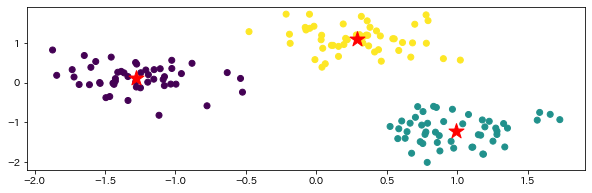

In [34]:
#クラスタ数を３に指定してクラスタリングを行う
km = KMeans(n_clusters=3,
            n_init=10,
            max_iter=300,
            random_state=0)
z_km = km.fit(X_norm)
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0], z_km.cluster_centers_[:,1],s=250,marker='*',c='red')
plt.show


## ノック5:シルエット分析で最適なクラスター数を探索してみよう




In [35]:
import imp
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(z_km.labels_)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, z_km.labels_)

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  """Entry point for launching an IPython kernel.


50
50
50


([<matplotlib.axis.YTick at 0x7f94ba9b3510>,
 [Text(0, 25.0, '1'), Text(0, 75.0, '2'), Text(0, 125.0, '3')])

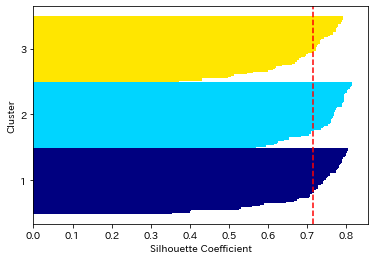

In [36]:
y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper +=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color
          )
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette Coefficient")
plt.yticks(yticks,cluster_labels + 1)    

適切にクラスタリングできていればシルエットの厚さは均等になる。<br>
Silhouette Coefficientが１に近いほどそのクラスタは他のクラスタから離れている。０に近いほど他のクラスタと接近、あるいは重なっている。マイナスだと誤ったクラスタに所属している。

<function matplotlib.pyplot.show(close=None, block=None)>

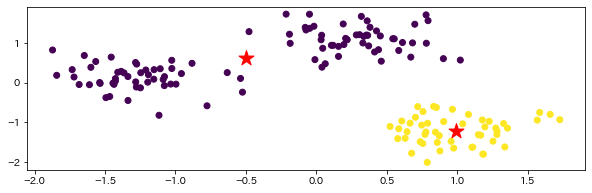

In [37]:
km = KMeans(n_clusters=2,
            n_init=10,
            max_iter=300,
            random_state=0)
z_km = km.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[
            :, 1], s=250, marker="*", c="red")
plt.show


100
50


([<matplotlib.axis.YTick at 0x7f94ca8c8e90>,
 [Text(0, 50.0, '1'), Text(0, 125.0, '2')])

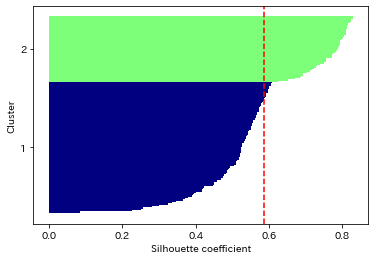

In [39]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels=np.unique(z_km.labels_)
n_clusters=cluster_labels.shape[0]

silhouette_vals=silhouette_samples(X, z_km.labels_,metric="euclidean")

y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper +=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color
          )
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show
plt.yticks(yticks,cluster_labels + 1)    

## ノック6:階層型クラスタリングを実施してみよう

## ノック7:樹形図(デンドログラム)を解釈してみよう

## ノック8:最短距離法で階層型クラスタリングを実施してみよう

## ノック9:最長距離法で階層型クラスタリングを実施してみよう

## ノック10:群平均法で階層型クラスタリングを実施してみよう